In [4]:
import numpy as np
import pandas as pd
import re

In [5]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [7]:
df.duplicated().sum()

121

In [8]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,dlf city plots,sector 26,12.5,38580.0,3240.0,Plot area 360(301.01 sq.m.),4,5,2,"servant room,study room",2.0,North-East,5 to 10 Year Old,"['Phase 2 Metro Station', 'Grand Mall', 'Jacaranda Marg', 'NH 148A', 'Lancers International School', 'The NorthCap University', 'RBS HOSPITAL', 'Indira Gandhi Intl Airport']","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '20 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


In [9]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2835,NaN,NaN,Plot area 502(419.74 sq.m.)Built Up area: 450 sq.yards (376.26 sq.m.)Carpet area: 400 sq.yards (334.45 sq.m.)
415,2.65,2047.0,Super Built up area 2047(190.17 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.)
2751,1.31,1617.0,Super Built up area 1617(150.22 sq.m.)
311,0.99,1091.0,Built Up area: 1091 (101.36 sq.m.)
389,1.30,1485.0,Super Built up area 1480(137.5 sq.m.)


In [10]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [11]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [12]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [13]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [14]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3093,0.53,flat,830.0,Carpet area: 822 (76.37 sq.m.),NaN,NaN,822.0
2943,1.55,flat,1608.0,Super Built up area 1608(149.39 sq.m.),1608.0,NaN,NaN
1922,1.55,flat,2356.0,Super Built up area 2356(218.88 sq.m.)Carpet area: 1750 sq.ft. (162.58 sq.m.),2356.0,NaN,1750.0
413,0.50,house,450.0,Plot area 450(41.81 sq.m.),NaN,NaN,NaN
3179,0.27,flat,587.0,Super Built up area 576(53.51 sq.m.),576.0,NaN,NaN


In [15]:
df.duplicated().sum()

121

In [16]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [17]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
6,3.50,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
9,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
28,19.00,house,6000.0,Plot area 9000(836.13 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),NaN,NaN,6000.0
30,7.00,house,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.),NaN,3900.0,3743.0


In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [19]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [20]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
6,3.50,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
9,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
32,0.95,house,450.0,Plot area 450(41.81 sq.m.),NaN,NaN,NaN
39,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN


In [21]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [22]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [23]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
6,3.50,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN
9,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
32,0.95,house,450.0,Plot area 450(41.81 sq.m.),NaN,450.00,NaN
39,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
45,6.20,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
54,1.70,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
57,7.25,house,2471.0,Plot area 303(253.35 sq.m.),NaN,303.00,NaN
74,10.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
77,4.60,house,2160.0,Plot area 240(200.67 sq.m.),NaN,240.00,NaN


In [25]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [26]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [27]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
6,3.50,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.00,NaN
9,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
32,0.95,house,450.0,Plot area 450(41.81 sq.m.),NaN,450.00,NaN
39,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
45,6.20,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
54,1.70,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
57,7.25,house,2471.0,Plot area 303(253.35 sq.m.),NaN,303.00,NaN
74,10.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
77,4.60,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.00,NaN


In [28]:
# update the original dataframe
df.update(all_nan_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [30]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,dlf city plots,sector 26,12.50,38580.0,3240.0,Plot area 360(301.01 sq.m.),4,5,2,"servant room,study room",2.0,North-East,5 to 10 Year Old,"['Phase 2 Metro Station', 'Grand Mall', 'Jacaranda Marg', 'NH 148A', 'Lancers International School', 'The NorthCap University', 'RBS HOSPITAL', 'Indira Gandhi Intl Airport']","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '20 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,3240.0,NaN
1,flat,imperia the esfera,sector 37c,0.99,5454.0,1815.0,Super Built up area 1815(168.62 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 1270 sq.ft. (117.99 sq.m.),3,5,3+,servant room,5.0,North-West,1 to 5 Year Old,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1815.0,1400.0,1270.0
2,flat,alpha corp gurgaonone,sector 84,1.49,7590.0,1963.0,Super Built up area 1963(182.37 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,3,3,servant room,6.0,South-East,1 to 5 Year Old,"['Delhi Public School', 'Raheja Market', 'Sapphire Mall', 'INXT High Street', 'Cambridge Pre-School', 'Euro Int. School', 'Genesis Hospital', 'HDFC Bank', 'Society Park', 'Dishoom Cinemas']",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",1963.0,NaN,1700.0
3,house,independent,sector 110,0.34,6800.0,500.0,Built Up area: 500 (46.45 sq.m.),1,1,0,not available,1.0,NaN,undefined,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Metro Hospital and Heart Institute Gurgaon', 'R K Hospital Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Jiya Clinic', 'Dr. Mittal Clinic', 'Bhardwaj Hospital', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Sneh Hospital Gurgaon', 'Dr. Hitesh Dawar', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Moti Mahal', 'Cafe Coffee Day', 'Pind Baluchi', 'Pizza Hut', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,500.0,NaN
4,flat,vatika sovereign next sector-82 a gurgaon,sector 82a,2.91,6700.0,4343.0,Super Built up area 4350(404.13 sq.m.)Carpet area: 3480 sq.ft. (323.3 sq.m.),4,4,3,"study room,servant room,store room",6.0,East,Under Construction,"['S.R.S. Hospital and Critical Care Unit', 'Orris Community Center', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petro

# 2.additionalRoom

In [31]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [32]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [33]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
451,servant room,0,1,0,0,0
1138,not available,0,0,0,0,0
1787,not available,0,0,0,0,0
1402,not available,0,0,0,0,0
2330,servant room,0,1,0,0,0


In [34]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,dlf city plots,sector 26,12.50,38580.0,3240.0,Plot area 360(301.01 sq.m.),4,5,2,"servant room,study room",2.0,North-East,5 to 10 Year Old,"['Phase 2 Metro Station', 'Grand Mall', 'Jacaranda Marg', 'NH 148A', 'Lancers International School', 'The NorthCap University', 'RBS HOSPITAL', 'Indira Gandhi Intl Airport']","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '20 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,3240.0,NaN,1,1,0,0,0
1,flat,imperia the esfera,sector 37c,0.99,5454.0,1815.0,Super Built up area 1815(168.62 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 1270 sq.ft. (117.99 sq.m.),3,5,3+,servant room,5.0,North-West,1 to 5 Year Old,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1815.0,1400.0,1270.0,0,1,0,0,0
2,flat,alpha corp gurgaonone,sector 84,1.49,7590.0,1963.0,Super Built up area 1963(182.37 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,3,3,servant room,6.0,South-East,1 to 5 Year Old,"['Delhi Public School', 'Raheja Market', 'Sapphire Mall', 'INXT High Street', 'Cambridge Pre-School', 'Euro Int. School', 'Genesis Hospital', 'HDFC Bank', 'Society Park', 'Dishoom Cinemas']",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",1963.0,NaN,1700.0,0,1,0,0,0
3,house,independent,sector 110,0.34,6800.0,500.0,Built Up area: 500 (46.45 sq.m.),1,1,0,not available,1.0,NaN,undefined,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Metro Hospital and Heart Institute Gurgaon', 'R K Hospital Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Jiya Clinic', 'Dr. Mittal Clinic', 'Bhardwaj Hospital', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Sneh Hospital Gurgaon', 'Dr. Hitesh Dawar', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Moti Mahal', 'Cafe Coffee Day', 'Pind Baluchi', 'Pizza Hut', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,500.0,NaN,0,0,0,0,0
4,flat,vatika sovereign next sector-82 a gurgaon,sector 82a,2.91,6700.0,4343.0,Super Built up area 4350(404.13 sq.m.)Carpet area: 3480 sq.ft. (323.3 sq.m.),4,4,3,"study room,servant room,store room",6.0,East,Under Construction,"['S.R.S. Hospital and Critical Car

# 3.agePossession

In [35]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Oct 2023                 4
Sep 2023                 4
Jul 2024                 4
Aug 2024                 4
By 2025                  4
Feb 2024                 3
May 2024                 3
Jan 2025                 3
Nov 2024                 3
Jun 2027                 2
Oct 2025                 2
Jan 2026                 2
Jul 2025                 2
Jul 2027                 2
By 2027                  2
Sep 2025                 2
Apr 2026                 2
Aug 2025      

In [36]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [37]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [38]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [39]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,dlf city plots,sector 26,12.50,38580.0,3240.0,Plot area 360(301.01 sq.m.),4,5,2,"servant room,study room",2.0,North-East,Moderately Old,"['Phase 2 Metro Station', 'Grand Mall', 'Jacaranda Marg', 'NH 148A', 'Lancers International School', 'The NorthCap University', 'RBS HOSPITAL', 'Indira Gandhi Intl Airport']","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '20 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,3240.0,NaN,1,1,0,0,0
1,flat,imperia the esfera,sector 37c,0.99,5454.0,1815.0,Super Built up area 1815(168.62 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 1270 sq.ft. (117.99 sq.m.),3,5,3+,servant room,5.0,North-West,Relatively New,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1815.0,1400.0,1270.0,0,1,0,0,0
2,flat,alpha corp gurgaonone,sector 84,1.49,7590.0,1963.0,Super Built up area 1963(182.37 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,3,3,servant room,6.0,South-East,Relatively New,"['Delhi Public School', 'Raheja Market', 'Sapphire Mall', 'INXT High Street', 'Cambridge Pre-School', 'Euro Int. School', 'Genesis Hospital', 'HDFC Bank', 'Society Park', 'Dishoom Cinemas']",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",1963.0,NaN,1700.0,0,1,0,0,0
3,house,independent,sector 110,0.34,6800.0,500.0,Built Up area: 500 (46.45 sq.m.),1,1,0,not available,1.0,NaN,Undefined,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Metro Hospital and Heart Institute Gurgaon', 'R K Hospital Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Jiya Clinic', 'Dr. Mittal Clinic', 'Bhardwaj Hospital', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Sneh Hospital Gurgaon', 'Dr. Hitesh Dawar', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Moti Mahal', 'Cafe Coffee Day', 'Pind Baluchi', 'Pizza Hut', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,500.0,NaN,0,0,0,0,0
4,flat,vatika sovereign next sector-82 a gurgaon,sector 82a,2.91,6700.0,4343.0,Super Built up area 4350(404.13 sq.m.)Carpet area: 3480 sq.ft. (323.3 sq.m.),4,4,3,"study room,servant room,store room",6.0,East,Under Construction,"['S.R.S. Hospital and Critical Care Un

# 4.furnishDetails

In [40]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3163,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['High Ceiling Height', 'False Ceiling Lighting', 'No open drainage around', 'Security Personnel', 'Natural Light', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting']"
335,"['1 Stove', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
770,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']"
1882,"['8 Wardrobe', '12 Fan', '1 Exhaust Fan', '8 Geyser', '12 Light', '8 AC', '1 Modular Kitchen', '2 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
3722,[],"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"


In [41]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_7248\2445438592.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [42]:
furnishings_df.shape

(3803, 19)

In [43]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_7248\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [44]:
furnishings_df.sample(5)

,Modular Kitchen,Fan,Bed,Curtains,Microwave,Sofa,Exhaust Fan,Dining Table,Water Purifier,Washing Machine,Wardrobe,TV,AC,Chimney,Geyser,Fridge,Stove,Light
1133,1,15,0,0,0,0,1,0,0,0,14,0,0,4,13,0,0,23
1296,1,4,0,1,0,0,0,0,0,0,2,0,0,1,2,0,0,15
1581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3542,1,8,0,0,0,0,1,0,0,0,5,0,5,0,0,0,0,20
110,1,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,1,0


In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [47]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

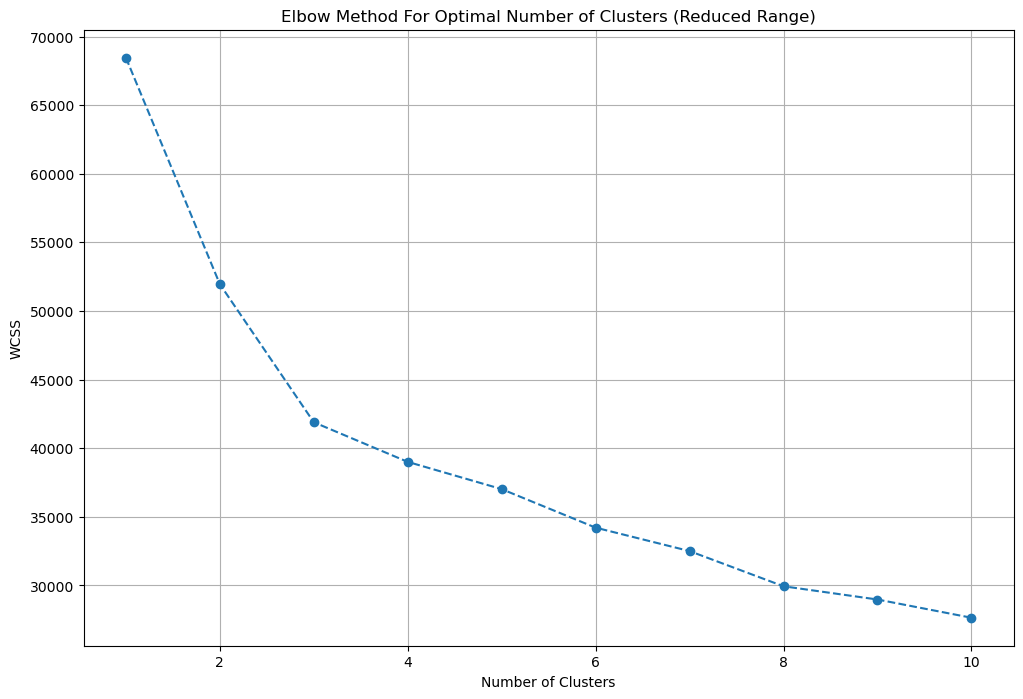

In [48]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [49]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [50]:
df = df.iloc[:,:-18]

In [51]:
df['furnishing_type'] = cluster_assignments

In [52]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3527,NaN,1
1747,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1052,NaN,1
42,"['7 Fan', '1 Exhaust Fan', '1 Geyser', '7 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2924,NaN,1


# 5.features

In [53]:
df[['society','features']].sample(5)

,society,features
1689,allure homes,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)']"
3329,signature the roselia,"['Lift(s)', 'Swimming Pool', 'Park']"
1532,ambience creacions,NaN
2341,independent,['Park']
2277,vatika sovereign next,"['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


In [54]:
df['features'].isnull().sum()

635

In [55]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [56]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [57]:
temp_df = df[df['features'].isnull()]

In [58]:
temp_df.shape

(635, 26)

In [59]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [60]:
df.loc[temp_df.index,'features'] = x.values

In [61]:
df['features'].isnull().sum()

481

In [62]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [63]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [64]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1830,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1455,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
features_binary_df.shape

(3803, 130)

In [66]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

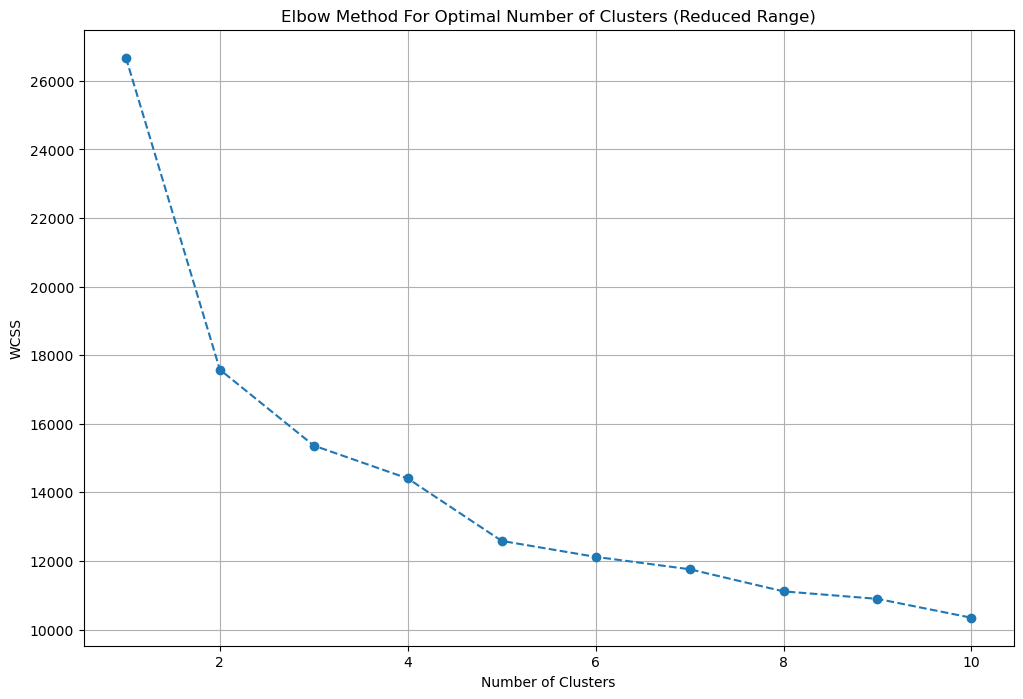

In [67]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [68]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [69]:
df['luxury_score'] = luxury_score

In [70]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,dlf city plots,sector 26,12.50,38580.0,3240.0,Plot area 360(301.01 sq.m.),4,5,2,"servant room,study room",2.0,North-East,Moderately Old,"['Phase 2 Metro Station', 'Grand Mall', 'Jacaranda Marg', 'NH 148A', 'Lancers International School', 'The NorthCap University', 'RBS HOSPITAL', 'Indira Gandhi Intl Airport']","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '20 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,3240.0,NaN,1,1,0,0,0,2,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Recently Renovated, Visitor Parking, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",121
1,flat,imperia the esfera,sector 37c,0.99,5454.0,1815.0,Super Built up area 1815(168.62 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 1270 sq.ft. (117.99 sq.m.),3,5,3+,servant room,5.0,North-West,Relatively New,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1815.0,1400.0,1270.0,0,1,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
2,flat,alpha corp gurgaonone,sector 84,1.49,7590.0,1963.0,Super Built up area 1963(182.37 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,3,3,servant room,6.0,South-East,Relatively New,"['Delhi Public School', 'Raheja Market', 'Sapphire Mall', 'INXT High Street', 'Cambridge Pre-School', 'Euro Int. School', 'Genesis Hospital', 'HDFC Bank', 'Society Park', 'Dishoom Cinemas']",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",1963.0,NaN,1700.0,0,1,0,0,0,1,"[Intercom Facility, Lift(s), Maintenance Staff, Park, Visitor Parking]",28
3,house,independent,sector 110,0.34,6800.0,500.0,Built Up area: 500 (46.45 sq.m.),1,1,0,not available,1.0,NaN,Undefined,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Metro Hospital and Heart Institute Gurgaon', 'R K Hospital Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Jiya Clinic', 'Dr. Mittal Clinic', 'Bhardwaj Hospital', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Sneh Hospital Gurgaon', 'Dr. Hitesh Dawar', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Moti Mahal', 'Cafe Coffee Day', 'Pind Baluchi', 'Pizza Hut', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY',

In [71]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [72]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3715,flat,ansal heights 86,sector 86,1.05,5541.0,1895.0,Super Built up area 1895(176.05 sq.m.),3,3,3,9.0,North-East,Under Construction,1895.0,NaN,NaN,0,1,0,0,0,1,0
2454,flat,ashiana mulberry,sohna road,0.95,6485.0,1465.0,Super Built up area 1465(136.1 sq.m.)Built Up area: 1175.97 sq.ft. (109.25 sq.m.)Carpet area: 834.96 sq.ft. (77.57 sq.m.),2,2,3+,3.0,NaN,New Property,1465.0,1175.97,834.96,1,0,0,0,0,1,89
1419,flat,orchid petals,sector 49,4.16,11700.0,3556.0,Super Built up area 3557(330.46 sq.m.),5,4,3+,14.0,East,Relatively New,3557.0,NaN,NaN,1,1,0,0,0,1,40
1759,house,independent,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,5.0,West,New Property,NaN,549.00,NaN,0,1,0,0,0,1,20
682,flat,umang monsoon breeze,sector 78,0.90,4615.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1854 sq.ft. (172.24 sq.m.),3,3,2,1.0,NaN,Moderately Old,1950.0,1900.00,1854.00,0,1,0,1,0,1,65


In [73]:
df.shape

(3803, 23)

In [74]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)